# IIC2115 - Programación como herramienta para la ingeniería

## Ejercicio Formativo 2 Capítulo 5
diego.herrerag00@uc.cl

Links útiles para los tags de Open Street Maps:

- https://wiki.openstreetmap.org/wiki/Map_features
- https://taginfo.openstreetmap.org/tags

## Importando Librerías

In [1]:
import osmnx as ox
import networkx as nx
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display #para mostrar más de un elemento por celda de Jupyter
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams.update({'font.size': 16})

## Misión 1: Estime el tiempo que demora en caminar una persona desde la estación de metro San Joaquín, hasta la sala B12

Generamos la red que contiene a la estación de metro San Joaquín y la sala BC24

In [2]:
cf='["highway"~"footway"]'

In [3]:
G_Macul = ox.graph.graph_from_place('Macul, Chile', network_type='walk')

Revisamos que es lo que hizo el filtro `custom_filter`

In [4]:
edges_G_Macul_gdf = ox.graph_to_gdfs(G_Macul, nodes=False)

In [5]:
edges_G_Macul_gdf["highway"].value_counts()

highway
footway                         4678
residential                     2906
living_street                   2320
secondary                       1220
tertiary                        1060
service                         1048
primary                          716
busway                           120
pedestrian                        82
unclassified                      74
[footway, steps]                  74
primary_link                      38
secondary_link                    28
[footway, corridor]               18
[service, footway]                16
[residential, living_street]      12
[footway, living_street]           6
[footway, residential]             6
steps                              6
[residential, footway]             6
[residential, path]                4
tertiary_link                      4
path                               4
[primary_link, tertiary]           2
[residential, tertiary]            2
[secondary, secondary_link]        2
[footway, path]               

Se obtienen los datos de las estaciones de metro

In [6]:
estaciones_metro = gpd.read_file('Data/Metro 2020/Estaciones_2020/Estaciones_2020.shp')

In [7]:
estaciones_metro.head(5)

,OBJECTID,ID_LINEA,LINEA,ESTACION,NOMBRE,POINT_X,POINT_Y,geometry
0,2,2,L2,EL PARRON,El Parrón,345717.3664,6.289105e+06,POINT (345717.366 6289105.444)
1,3,5,L5,CUMMING,Cumming,344899.1198,6.298782e+06,POINT (344899.120 6298781.571)
2,4,5,L5,QUINTA NORMAL,Quinta Normal,343809.1081,6.298628e+06,POINT (343808.803 6298622.125)
3,5,7,L4A,SAN RAMON,San Ramón,346685.4133,6.287624e+06,POINT (347436.975 6287501.270)
4,6,7,L4A,SANTA ROSA,Santa Rosa,348282.5816,6.287378e+06,POINT (348282.582 6287378.409)


In [8]:
estaciones_metro.crs

<Projected CRS: EPSG:32719>
Name: WGS 84 / UTM zone 19S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°W and 66°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Chile. Colombia. Peru.
- bounds: (-72.0, -80.0, -66.0, 0.0)
Coordinate Operation:
- name: UTM zone 19S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
estaciones_metro.to_crs("EPSG:4326", inplace=True)

Filtramos para dejar solo los datos que necesitamos, se dejan solo los datos de la estación de metro San Joaquín

In [10]:
estacion_metro_San_Joaquin = estaciones_metro.loc[estaciones_metro["NOMBRE"]=="San Joaquín"]

In [11]:
estacion_metro_San_Joaquin.head()

,OBJECTID,ID_LINEA,LINEA,ESTACION,NOMBRE,POINT_X,POINT_Y,geometry
43,46,5,L5,SAN JOAQUIN,San Joaquín,349853.0827,6.292455e+06,POINT (-70.61593 -33.49900)


Se obtiene la posición de la estación de metro San Joaquín a partir de la geometría

In [12]:
posicion_metro_San_Joaquin = (estacion_metro_San_Joaquin.geometry.x.iloc[0], estacion_metro_San_Joaquin.geometry.y.iloc[0])

In [13]:
print(posicion_metro_San_Joaquin)

(-70.61592605445665, -33.49900096226658)


Se obtiene el nodo más cercano a la posición del metro San Joaquín

In [14]:
nodo_estacion_metro_San_Joaquin = ox.distance.nearest_nodes(G_Macul, posicion_metro_San_Joaquin[0], posicion_metro_San_Joaquin[1])

Usando Google Maps se obtuvo que las coordenadas de la sala A1 son las siguientes:

In [15]:
posicion_B12 = (-33.500282, -70.613181)

Se obtiene el nodo más cercano a la posición de la sala BC24

In [16]:
nodo_sala_B12 = ox.distance.nearest_nodes(G_Macul, posicion_B12[1], posicion_B12[0])

### Forma A

Se calcula la distancia entre la estación de metro San Joaquín y la sala B12, se asume que la persona optará por toma el camino más corto.

In [17]:
distancia_SJ_B12 = nx.shortest_path_length(G_Macul, nodo_estacion_metro_San_Joaquin, nodo_sala_B12, weight = 'length')

In [18]:
print(f"La distancia desde la estación de metro San Joaquín a la sala B12 es: {distancia_SJ_B12} metros")

La distancia desde la estación de metro San Joaquín a la sala B12 es: 462.296 metros


La velocidad al caminar de una persona promedio es 3-5 km/h, se tomará el valor más bajo 3km/h esto a metros/min es 50m/min.

In [19]:
tiempo_estacion_SJ_B12 = distancia_SJ_B12 / 50

In [20]:
print(f"El tiempo que demora en caminar una persona desde la estación de metro San Joaquín hasta la sala B12 es: {tiempo_estacion_SJ_B12} minutos aproximadamente")

El tiempo que demora en caminar una persona desde la estación de metro San Joaquín hasta la sala B12 es: 9.24592 minutos aproximadamente


### Forma B

In [21]:
hwy_speeds={ 'footway': 3 }

In [22]:
G_Macul = ox.add_edge_speeds(G_Macul, hwy_speeds=hwy_speeds)

In [23]:
G_Macul = ox.add_edge_travel_times(G_Macul)

In [24]:
edges_G_Macul_gdf = ox.graph_to_gdfs(G_Macul, nodes=False)

In [25]:
edges_G_Macul_gdf.head(5)

osmid  oneway lanes                      name  \
u        v           key                                                      
14760650 12507840632 0    447262499   False     2  Avenida Rodrigo de Araya   
         12056362959 0    997986712   False     2  Avenida Rodrigo de Araya   
         457762152   0    933723905   False     3   Avenida Vicuña Mackenna   
16106390 3923832973  0    447885513   False     2   Avenida Vicuña Mackenna   
         11959759509 0    851719177   False     3     Avenida Departamental   

                            highway reversed   length  speed_kph  travel_time  \
u        v           key                                                        
14760650 12507840632 0    secondary    False   67.742       46.6          5.2   
         12056362959 0    secondary     True   10.513       46.6          0.8   
         457762152   0      primary     True  381.529       50.0         27.5   
16106390 3923832973  0      primary    False   38.709       40.0          3.5   
         11959759509 0      primary    False   18.361       50.0          1.3   

                         maxspeed  \
u        v           key            
14760650 12507840632 0        NaN   
         12056362959 0        NaN   
         457762152   0         50   
16106390 3923832973  0         40   
         11959759509 0         50   

                                                                   geometry  \
u        v           key                                                      
14760650 12507840632 0    LINESTRING (-70.62290 -33.47492, -70.62217 -33...   
         12056362959 0    LINESTRING (-70.62290 -33.47492, -70.62301 -33...   
         457762152   0    LINESTRING (-70.62290 -33.47492, -70.62277 -33...   
16106390 3923832973  0    LINESTRING (-70.61237 -33.50825, -70.61268 -33...   
         11959759509 0    LINESTRING (-70.61237 -33.50825, -70.61257 -33...   

                         bridge width junction service access tunnel  
u        v           key                                              
14760650 12507840632 0      NaN   NaN      NaN     NaN    NaN    NaN  
         12056362959 0      NaN   NaN      NaN     NaN    NaN    NaN  
         457762152   0      NaN   NaN      NaN     NaN    NaN    NaN  
16106390 3923832973  0      NaN   NaN      NaN     NaN    NaN    NaN  
         11959759509 0      NaN   NaN      NaN     NaN    NaN    NaN

In [26]:
tiempo_estacion_SJ_B12 = nx.shortest_path_length(G_Macul, nodo_estacion_metro_San_Joaquin, nodo_sala_B12, weight='travel_time')

In [27]:
print(f"El tiempo que demora en caminar una persona desde la estación de metro San Joaquín hasta la sala B12 es: {tiempo_estacion_SJ_B12/60} minutos aproximadamente")

El tiempo que demora en caminar una persona desde la estación de metro San Joaquín hasta la sala B12 es: 7.296666666666666 minutos aproximadamente


## Misión 2: Un estudiante olvidó el computador en su casa y debe ir a buscarlo durante el horario de almuerzo para poder participar de la clase de Programación como Herramienta para la Ingeniería. Si antes del almuerzo el estudiante tenía clases en la sala A3, ¿cuál es el distrito censal de Santiago urbano más lejano en el que se puede ubicar su casa? Asuma que solo es posible caminar y viajar en metro

Datos:
* Velocidad al caminar de una persona: 3km/h
* Velocidad promedio del metro: 34km/h
* Tiempo disponible: 1 hora con 20 minutos u 80 minutos

Lógica:

Para determinar el distrito censal de Santiago urbano más lejano en el que se puede ubicar su casa, se buscará el distrito al que le tome llegar 40 minutos  desde la sala A3, esto es debido a que el estudiante debería ir por su computador y traerlo, el tiempo que le toma buscar su computador en su casa se despreciará.

Se obtiene la posición de la sala A3

In [28]:
posicion_A3 = (-33.499876, -70.612782)

Se obtienen los datos de Santiago urbano

In [29]:
chile_urbano = gpd.read_file('Data/Areas Urbanas/areas_urbanas.shp')

In [30]:
chile_urbano.to_crs("EPSG:4326", inplace=True)

In [31]:
santiago_urbano = chile_urbano.loc[chile_urbano['NOMBRE']=='Santiago']

Se genera la red que solo considera caminos peatonales y carreteras (primarias y secundarias)

In [32]:
cf='["highway"~"footway|primary|secondary"]'

In [33]:
G_caminar_santiago_urbano = ox.graph.graph_from_polygon(santiago_urbano.geometry.iloc[0], network_type='walk', custom_filter=cf)

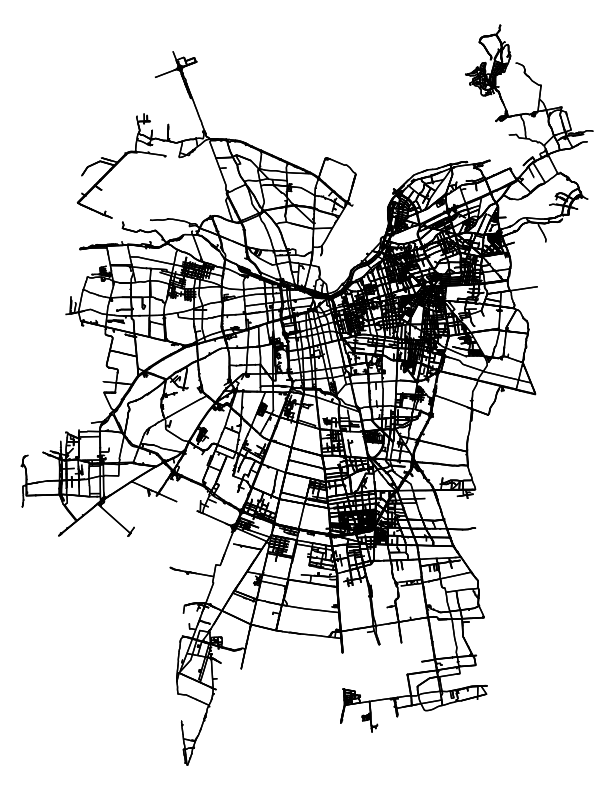

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

In [34]:
ox.plot_graph(G_caminar_santiago_urbano, figsize = (10,10), bgcolor = 'w', node_color = 'red', edge_color = 'black', node_alpha = 0)

Se genera un Geodataframe a partir de la red para revisar los efecto del filtro hecho con el parámetro `custom_filter`

In [35]:
edges_caminar_santiago_urbano_gdf = ox.graph_to_gdfs(G_caminar_santiago_urbano, nodes=False)

Como se puede ver solo se considerán las vías que se señalaron en el filtro

In [36]:
edges_caminar_santiago_urbano_gdf["highway"].value_counts()

highway
footway                               75894
secondary                             13998
primary                               11972
primary_link                           1982
secondary_link                         1094
[secondary, primary]                     44
[primary_link, secondary]                20
[footway, primary_link]                  12
[primary_link, primary]                  10
[secondary, secondary_link]              10
[footway, secondary]                      2
[primary_link, secondary, primary]        2
[primary_link, secondary_link]            2
[footway, secondary_link]                 2
Name: count, dtype: int64

In [37]:
edges_caminar_santiago_urbano_gdf.columns

Index(['osmid', 'oneway', 'lanes', 'name', 'highway', 'maxspeed', 'reversed',
       'length', 'geometry', 'bridge', 'access', 'ref', 'width', 'junction',
       'tunnel', 'area'],
      dtype='object')

Se ajusta la velocidad, la siguiente línea de código hace que independiente de la vía que se use se recorrera a una velocidad de 3km/h

In [38]:
hs = {'footway': 3, 'primary': 3, 'primary_link': 3 , 'secondary': 3, 'secondary_link': 3}

In [39]:
G_caminar_santiago_urbano = ox.add_edge_speeds(G_caminar_santiago_urbano, hwy_speeds=hs)

In [40]:
(nodes_caminar_santiago_urbano_gdf, edges_caminar_santiago_urbano_gdf) = ox.graph_to_gdfs(G_caminar_santiago_urbano)

In [41]:
edges_caminar_santiago_urbano_gdf["speed_kph"].value_counts()

speed_kph
3.0     85566
50.0    17618
40.0      862
30.0      460
60.0      350
45.0       72
55.0       70
70.0       18
20.0       16
35.0       10
43.0        2
Name: count, dtype: int64

In [42]:
edges_caminar_santiago_urbano_gdf.apply(lambda x: sum(x.isnull()),axis=0)

osmid             0
oneway            0
lanes         76746
name          78086
highway           0
maxspeed      85566
reversed          0
length            0
speed_kph         0
geometry          0
bridge       103784
access       101642
ref          104252
width        104482
junction     104820
tunnel       104824
area         104972
dtype: int64

In [43]:
edges_caminar_santiago_urbano_gdf['speed_kph'] = 3

In [44]:
edges_caminar_santiago_urbano_gdf["speed_kph"].value_counts()

speed_kph
3    105044
Name: count, dtype: int64

In [45]:
G_caminar_santiago_urbano = ox.graph_from_gdfs(nodes_caminar_santiago_urbano_gdf, edges_caminar_santiago_urbano_gdf)

Se genera la red que solo considera las estaciones de metro, las entradas a las estaciones de metro y los rieles del metro

In [46]:
cf = '["railway"~"station|subway_entrance|subway"]'

In [47]:
G_metro_santiago_urbano = ox.graph.graph_from_polygon(santiago_urbano.geometry.iloc[0], retain_all = True, custom_filter=cf)

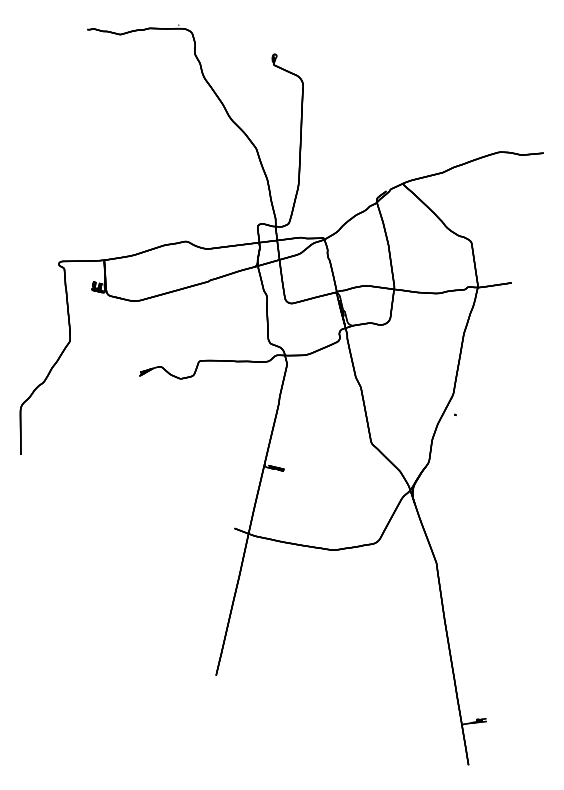

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

In [48]:
ox.plot_graph(G_metro_santiago_urbano, figsize = (10,10), bgcolor = 'w', node_color = 'red', edge_color = 'black', node_alpha = 0)

In [49]:
(nodes_metro_santiago_urbano_gdf, edges_metro_santiago_urbano_gdf) = ox.graph_to_gdfs(G_metro_santiago_urbano)

In [50]:
edges_metro_santiago_urbano_gdf.columns

Index(['osmid', 'tunnel', 'ref', 'name', 'oneway', 'reversed', 'length',
       'bridge', 'geometry', 'service'],
      dtype='object')

In [51]:
edges_metro_santiago_urbano_gdf['highway'] = 'subway'

In [52]:
G_metro_santiago_urbano = ox.graph_from_gdfs(nodes_metro_santiago_urbano_gdf, edges_metro_santiago_urbano_gdf)

Se ajusta la velocidad, la siguiente línea de código hace que independiente de la vía que se use se recorrera a una velocidad de 34km/h

In [53]:
G_metro_santiago_urbano = ox.add_edge_speeds(G_metro_santiago_urbano, hwy_speeds={'subway': 34})

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/osmnx/routing.py:297: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  edges[["highway", "speed_kph"]].set_index("highway").iloc[:, 0].fillna(hwy_speed_avg)


In [54]:
(nodes_metro_santiago_urbano_gdf, edges_metro_santiago_urbano_gdf) = ox.graph_to_gdfs(G_metro_santiago_urbano)

In [55]:
edges_metro_santiago_urbano_gdf['speed_kph'].value_counts()

speed_kph
34    810
Name: count, dtype: int64

Se combinan las redes

In [56]:
G_caminar_metro = nx.compose(G_metro_santiago_urbano, G_caminar_santiago_urbano)

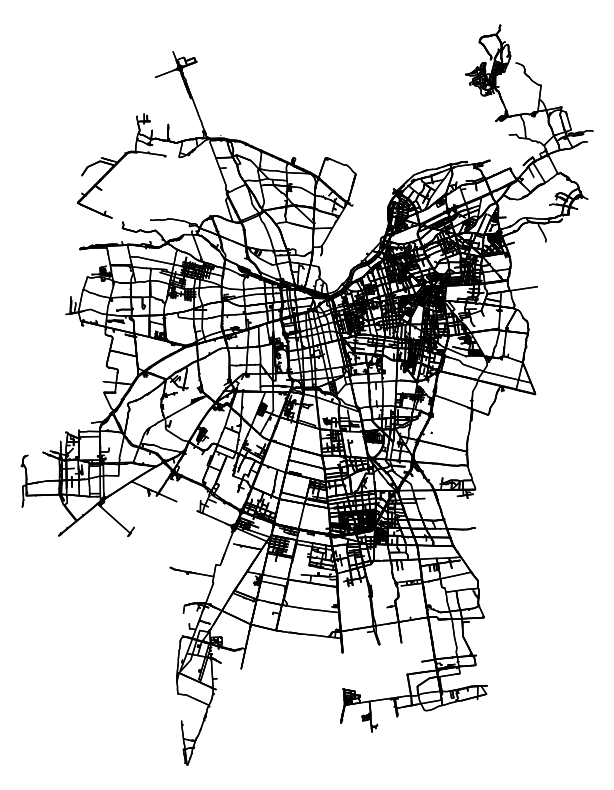

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

In [57]:
ox.plot_graph(G_caminar_metro, figsize=(10, 10), bgcolor='w', node_color='red', edge_color='black', node_alpha=0)

Se calcula el tiempo de viaje en base a la longitud y la velocidad de cada arista

In [58]:
G_caminar_metro = ox.add_edge_travel_times(G_caminar_metro)

Se obtiene la información de los distritos censales

In [59]:
distritos = gpd.read_file('Data/Distritos Censales/Distritos Censales RM.shp')

In [60]:
distritos.to_crs('EPSG:4326', inplace=True)

Nos quedamos solo con los distritos censales de Santiago urbano

In [61]:
distritos_santiago_urbano = gpd.overlay(distritos, santiago_urbano, how='intersection')

In [62]:
distritos_santiago_urbano_m2 = distritos_santiago_urbano.copy()

In [63]:
nodo_A3 = ox.distance.nearest_nodes(G_caminar_metro, posicion_A3[1], posicion_A3[0])

In [64]:
distritos_santiago_urbano_m2['nodo_distrito'] = distritos_santiago_urbano_m2.apply(lambda distrito: ox.distance.nearest_nodes(G_caminar_metro, distrito.geometry.centroid.x, distrito.geometry.centroid.y), axis=1)

In [65]:
distritos_santiago_urbano_m2.head(5)

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,...,ADIMARK_T,Area,Densidad,1_UF_M2,NOMBRE,TIPO_AREA,SHAPE_Leng,SHAPE_Area,geometry,nodo_distrito
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,...,3412.0,704315.75,48.44,31.09,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((-70.64812 -33.43330, -70.64645 -33.4...",6358908261
1,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Moneda,1310102.0,51.0,560.0,999.0,...,2741.0,1166659.89,23.49,21.10,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((-70.65698 -33.43182, -70.65337 -33.4...",10702059675
2,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Amunátegui,1310103.0,38.0,389.0,956.0,...,2387.0,509080.85,46.89,12.00,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((-70.66031 -33.43095, -70.65861 -33.4...",5419431460
3,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Brasil,1310104.0,52.0,657.0,1728.0,...,5062.0,761738.52,66.45,10.25,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((-70.66020 -33.43747, -70.66004 -33.4...",10838167422
4,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Chacabuco,1310105.0,45.0,643.0,1092.0,...,2899.0,765782.74,37.86,11.87,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((-70.67786 -33.44386, -70.66817 -33.4...",11062781023


In [66]:
def calcular_tiempo_viaje(grafo, nodo_inicio, nodo_fin):
    try:
        tiempo_viaje = nx.shortest_path_length(grafo, nodo_inicio, nodo_fin, weight='travel_time')
    except nx.NetworkXNoPath:
        tiempo_viaje = float('inf')  # Valor por defecto si no hay camino
    return tiempo_viaje

In [67]:
distritos_santiago_urbano_m2['tiempo_viaje_A3'] = distritos_santiago_urbano_m2.apply(lambda distrito: calcular_tiempo_viaje(G_caminar_metro, nodo_A3, distrito.nodo_distrito), axis=1)

In [68]:
distritos_santiago_urbano_m2.head(5)

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,...,Area,Densidad,1_UF_M2,NOMBRE,TIPO_AREA,SHAPE_Leng,SHAPE_Area,geometry,nodo_distrito,tiempo_viaje_A3
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,...,704315.75,48.44,31.09,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((-70.64812 -33.43330, -70.64645 -33.4...",6358908261,9592.2
1,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Moneda,1310102.0,51.0,560.0,999.0,...,1166659.89,23.49,21.10,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((-70.65698 -33.43182, -70.65337 -33.4...",10702059675,10933.8
2,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Amunátegui,1310103.0,38.0,389.0,956.0,...,509080.85,46.89,12.00,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((-70.66031 -33.43095, -70.65861 -33.4...",5419431460,11429.4
3,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Brasil,1310104.0,52.0,657.0,1728.0,...,761738.52,66.45,10.25,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((-70.66020 -33.43747, -70.66004 -33.4...",10838167422,11741.2
4,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Chacabuco,1310105.0,45.0,643.0,1092.0,...,765782.74,37.86,11.87,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((-70.67786 -33.44386, -70.66817 -33.4...",11062781023,12639.1


In [69]:
distritos_cumplen_tiempo = distritos_santiago_urbano_m2.loc[distritos_santiago_urbano_m2['tiempo_viaje_A3'] <= 40 * 60]

In [70]:
distritos_cumplen_tiempo.head()

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,...,Area,Densidad,1_UF_M2,NOMBRE,TIPO_AREA,SHAPE_Leng,SHAPE_Area,geometry,nodo_distrito,tiempo_viaje_A3
174,Región Metropolitana De Santiago,131,Santiago,13118,Macul,Pedreros,1311803.0,159.0,1478.0,2229.0,...,2944739.99,21.75,6.69,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((-70.61632 -33.49619, -70.61274 -33.4...",2624777541,1986.1
175,Región Metropolitana De Santiago,131,Santiago,13118,Macul,Camino Agrícola,1311804.0,109.0,1279.0,1863.0,...,1941906.73,25.12,9.15,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((-70.61870 -33.48612, -70.61778 -33.4...",10830651846,2243.3
283,Región Metropolitana De Santiago,131,Santiago,13129,San Joaquín,El Pinar,1312902.0,257.0,1684.0,1258.0,...,1227059.16,30.06,4.39,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((-70.62612 -33.48581, -70.62055 -33.4...",12523107244,2097.9


In [71]:
distrito_m2_solicitado = distritos_cumplen_tiempo.iloc[0]

In [72]:
print(f"El distrito censal de Santiago urbano más lejano en el que se puede ubicar su casa es: {distrito_m2_solicitado['NOM_DIS']}, se tarda en llegar {distrito_m2_solicitado['tiempo_viaje_A3']/60} minutos aproximadamente")

El distrito censal de Santiago urbano más lejano en el que se puede ubicar su casa es: Pedreros, se tarda en llegar 33.10166666666667 minutos aproximadamente


Se visualizará la ruta

In [73]:
ruta_A3_distrito_m2_solicitado = nx.shortest_path(G_caminar_metro, nodo_A3, distrito_m2_solicitado.nodo_distrito, weight='travel_time')

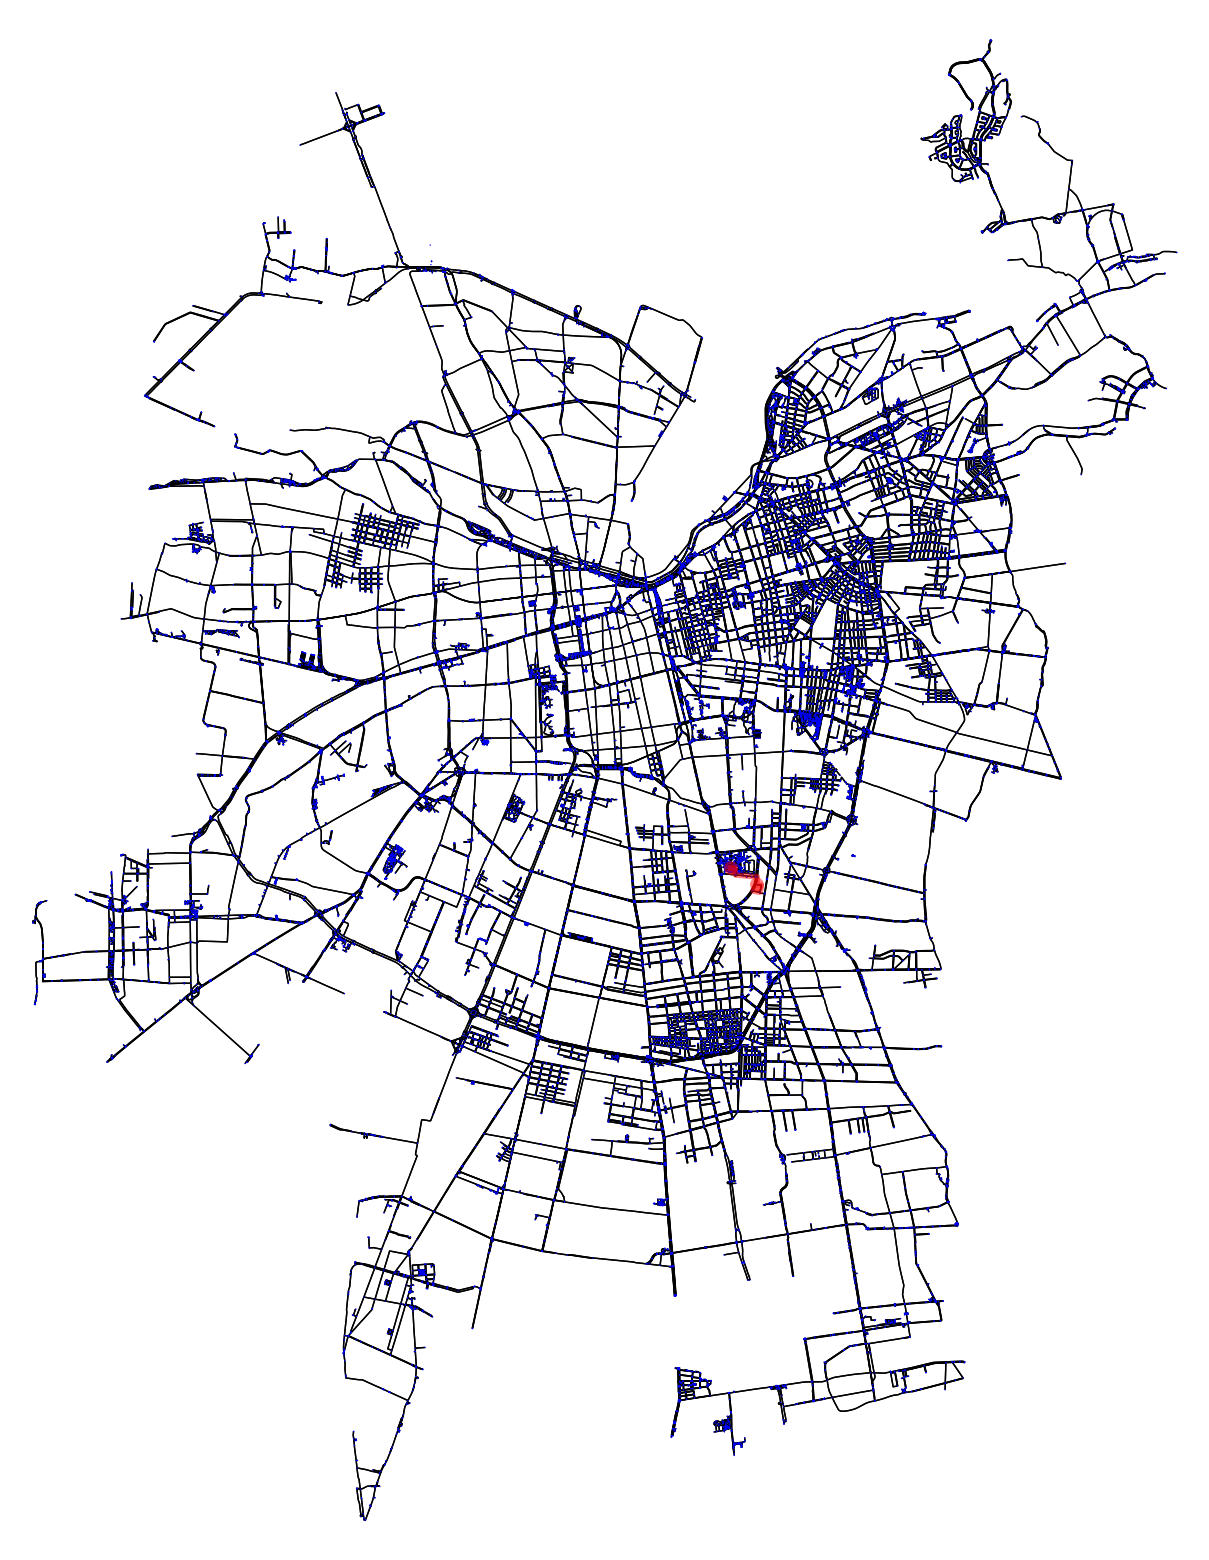

(<Figure size 2000x2000 with 1 Axes>, <Axes: >)

In [74]:
ox.plot_graph_route(G_caminar_metro, ruta_A3_distrito_m2_solicitado, node_size = 1, figsize=(20,20), bgcolor = 'w', node_color = 'blue', edge_color = 'black')

## Misión 3: Repita el ejercicio de la misión anterior, pero teniendo esta vez la posibilidad de utilizar un vehículo particular para viajar. Considere en su desarrollo que el vehículo necesita estacionamiento en el campus

Se debe recordar que se pueden especificar diferentes tipos de redes con el argumento `network_type`, por ejemplo:

- `drive`: Obtiene todas las calles públicas.
- `drive_service`: Obtiene todas las calles públicas, incluyendo vías de servicio.
- `walk`: Obtiene todos los tramos, vias o calles donde pueden transitar peatones.
- `bike`: Obtiene todas las vías donde pueden transitar ciclistas.
- `all`: Descarga todos los tramos de acceso público.
- `all_private`: Descarga todos los tramos de acceso público, incluidas las vías privadas.

Busca la posición del estacionamiento

In [75]:
posicion_estacionamiento = (-33.49669012589041, -70.61240959464479)

Genero la red en la que solo se puede conducir

In [76]:
cf='["highway"~"primary|secondary"]'

In [77]:
G_conducir_santiago_urbano = ox.graph.graph_from_polygon(santiago_urbano.geometry.iloc[0], network_type='drive', custom_filter=cf)

Asigno velocidades a las aristas

In [78]:
hwy_speeds={
        "primary": 30,
        "primary_link": 30,
        "secondary": 30,
        "secondary_link": 30,
    }

In [79]:
G_conducir_santiago_urbano = ox.add_edge_speeds(G_conducir_santiago_urbano, hwy_speeds=hwy_speeds)

Se muestra la red generada

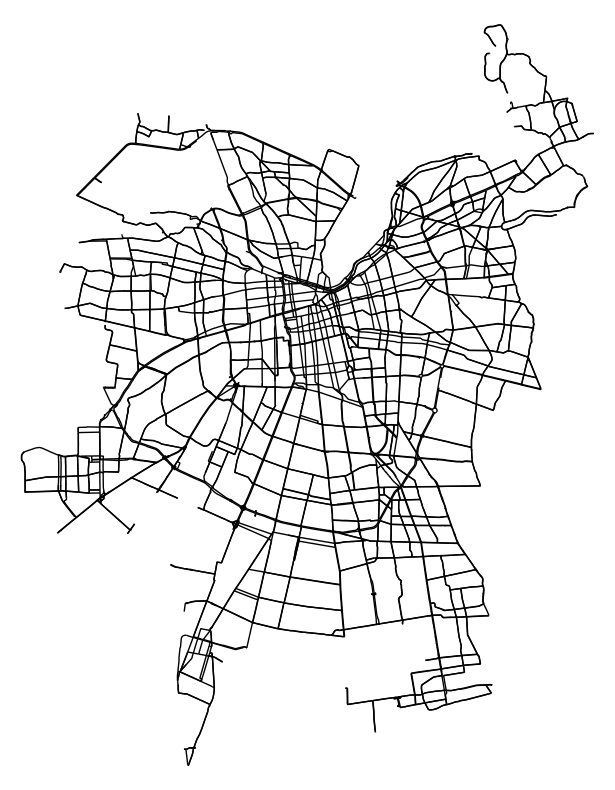

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

In [80]:
ox.plot_graph(G_conducir_santiago_urbano, figsize = (10,10), bgcolor = 'w', node_color = 'red', edge_color = 'black', node_alpha = 0)

Genero red en la que solo se puede caminar, en esta ocasión solo considero `footway`

In [81]:
cf='["highway"~"footway"]'

In [82]:
G_caminar_santiago_urbano = ox.graph.graph_from_polygon(santiago_urbano.geometry.iloc[0], network_type='walk', custom_filter=cf)

Asigno velocidades a la red en la que solo se puede caminar

In [83]:
hwy_speeds={ 'footway': 3 }

In [84]:
G_caminar_santiago_urbano = ox.add_edge_speeds(G_caminar_santiago_urbano, hwy_speeds=hwy_speeds)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/osmnx/routing.py:297: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  edges[["highway", "speed_kph"]].set_index("highway").iloc[:, 0].fillna(hwy_speed_avg)


In [85]:
edges_caminar_santiago_urbano_gdf = ox.graph_to_gdfs(G_caminar_santiago_urbano, nodes=False)

Combino las redes

In [86]:
G_caminar_metro = nx.compose(G_metro_santiago_urbano, G_caminar_santiago_urbano)

In [87]:
G_caminar_conducir_metro = nx.compose(G_caminar_metro, G_conducir_santiago_urbano)

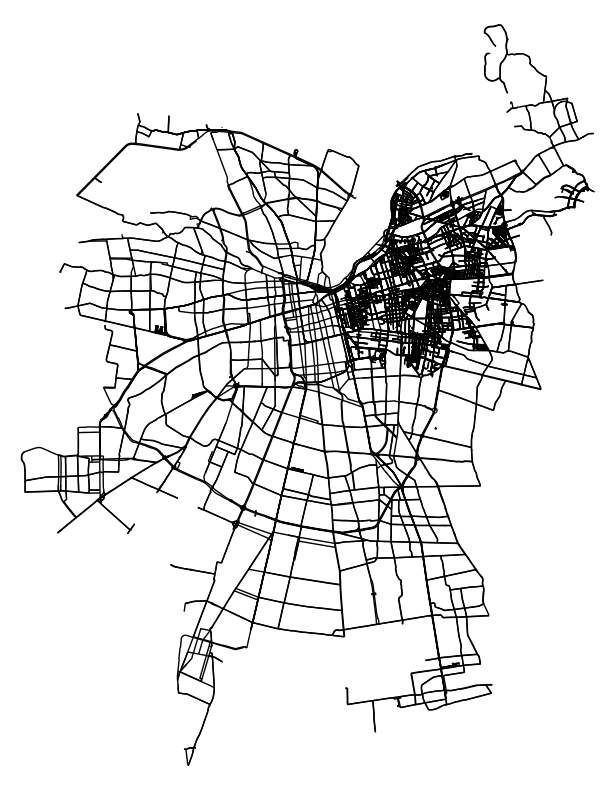

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

In [88]:
ox.plot_graph(G_caminar_conducir_metro, figsize = (10,10), bgcolor = 'w', node_color = 'red', edge_color = 'black', node_alpha = 0)

Calculo velocidades para cada arista

In [89]:
G_caminar_conducir_metro = ox.add_edge_travel_times(G_caminar_conducir_metro)

Genero el nodo asiciado a la sala A3

In [90]:
nodo_A3 = ox.distance.nearest_nodes(G_caminar_conducir_metro, posicion_A3[1], posicion_A3[0])

Genero el nodo asociado al estacionamiento

In [91]:
nodo_estacionamiento = ox.distance.nearest_nodes(G_caminar_conducir_metro, posicion_estacionamiento[1], posicion_estacionamiento[0])

Tiempo desde la sala A3 al estacionamiento

In [92]:
tiempo_estacion_A3_Estacionamiento = nx.shortest_path_length(G_caminar_conducir_metro, nodo_A3, nodo_estacionamiento, weight='travel_time')

In [93]:
print(f"Desde la sala A3 toma llegar al estacionamiento: {tiempo_estacion_A3_Estacionamiento/60} minutos aproximadamente")

Desde la sala A3 toma llegar al estacionamiento: 0.725 minutos aproximadamente


In [94]:
tiempo_disponible = 40*60 - 2*tiempo_estacion_A3_Estacionamiento

In [95]:
distritos_santiago_urbano_m3 = distritos_santiago_urbano.copy()

In [96]:
distritos_santiago_urbano_m3['nodo_distrito'] = distritos_santiago_urbano_m3.apply(lambda distrito: ox.distance.nearest_nodes(G_caminar_conducir_metro, distrito.geometry.centroid.x, distrito.geometry.centroid.y), axis=1)

In [97]:
distritos_santiago_urbano_m3['tiempo_viaje_estacionamiento'] = distritos_santiago_urbano_m3.apply(lambda distrito: calcular_tiempo_viaje(G_caminar_conducir_metro, nodo_estacionamiento, distrito.nodo_distrito), axis=1)

In [98]:
distritos_cumplen_tiempo = distritos_santiago_urbano_m3.loc[distritos_santiago_urbano_m3['tiempo_viaje_estacionamiento'] <= tiempo_disponible]

In [99]:
distritos_cumplen_tiempo.head(5)

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,...,Area,Densidad,1_UF_M2,NOMBRE,TIPO_AREA,SHAPE_Leng,SHAPE_Area,geometry,nodo_distrito,tiempo_viaje_estacionamiento
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,...,704315.75,48.44,31.09,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((-70.64812 -33.43330, -70.64645 -33.4...",6358908261,574.4
1,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Moneda,1310102.0,51.0,560.0,999.0,...,1166659.89,23.49,21.10,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((-70.65698 -33.43182, -70.65337 -33.4...",386348,666.4
2,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Amunátegui,1310103.0,38.0,389.0,956.0,...,509080.85,46.89,12.00,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((-70.66031 -33.43095, -70.65861 -33.4...",5419431460,724.1
3,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Brasil,1310104.0,52.0,657.0,1728.0,...,761738.52,66.45,10.25,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((-70.66020 -33.43747, -70.66004 -33.4...",14760683,749.4
4,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Chacabuco,1310105.0,45.0,643.0,1092.0,...,765782.74,37.86,11.87,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((-70.67786 -33.44386, -70.66817 -33.4...",253281854,744.8


In [100]:
distrito_max_tiempo = distritos_cumplen_tiempo.loc[distritos_cumplen_tiempo['tiempo_viaje_estacionamiento'].idxmax()]

In [101]:
print(f"El distrito más lejano posible es el distrito: {distrito_max_tiempo['NOM_DIS']}")

El distrito más lejano posible es el distrito: Cerro San Luis


In [102]:
ruta_distrito_max_tiempo = nx.shortest_path(G_caminar_conducir_metro, nodo_estacionamiento, distrito_max_tiempo.nodo_distrito, weight='travel_time')

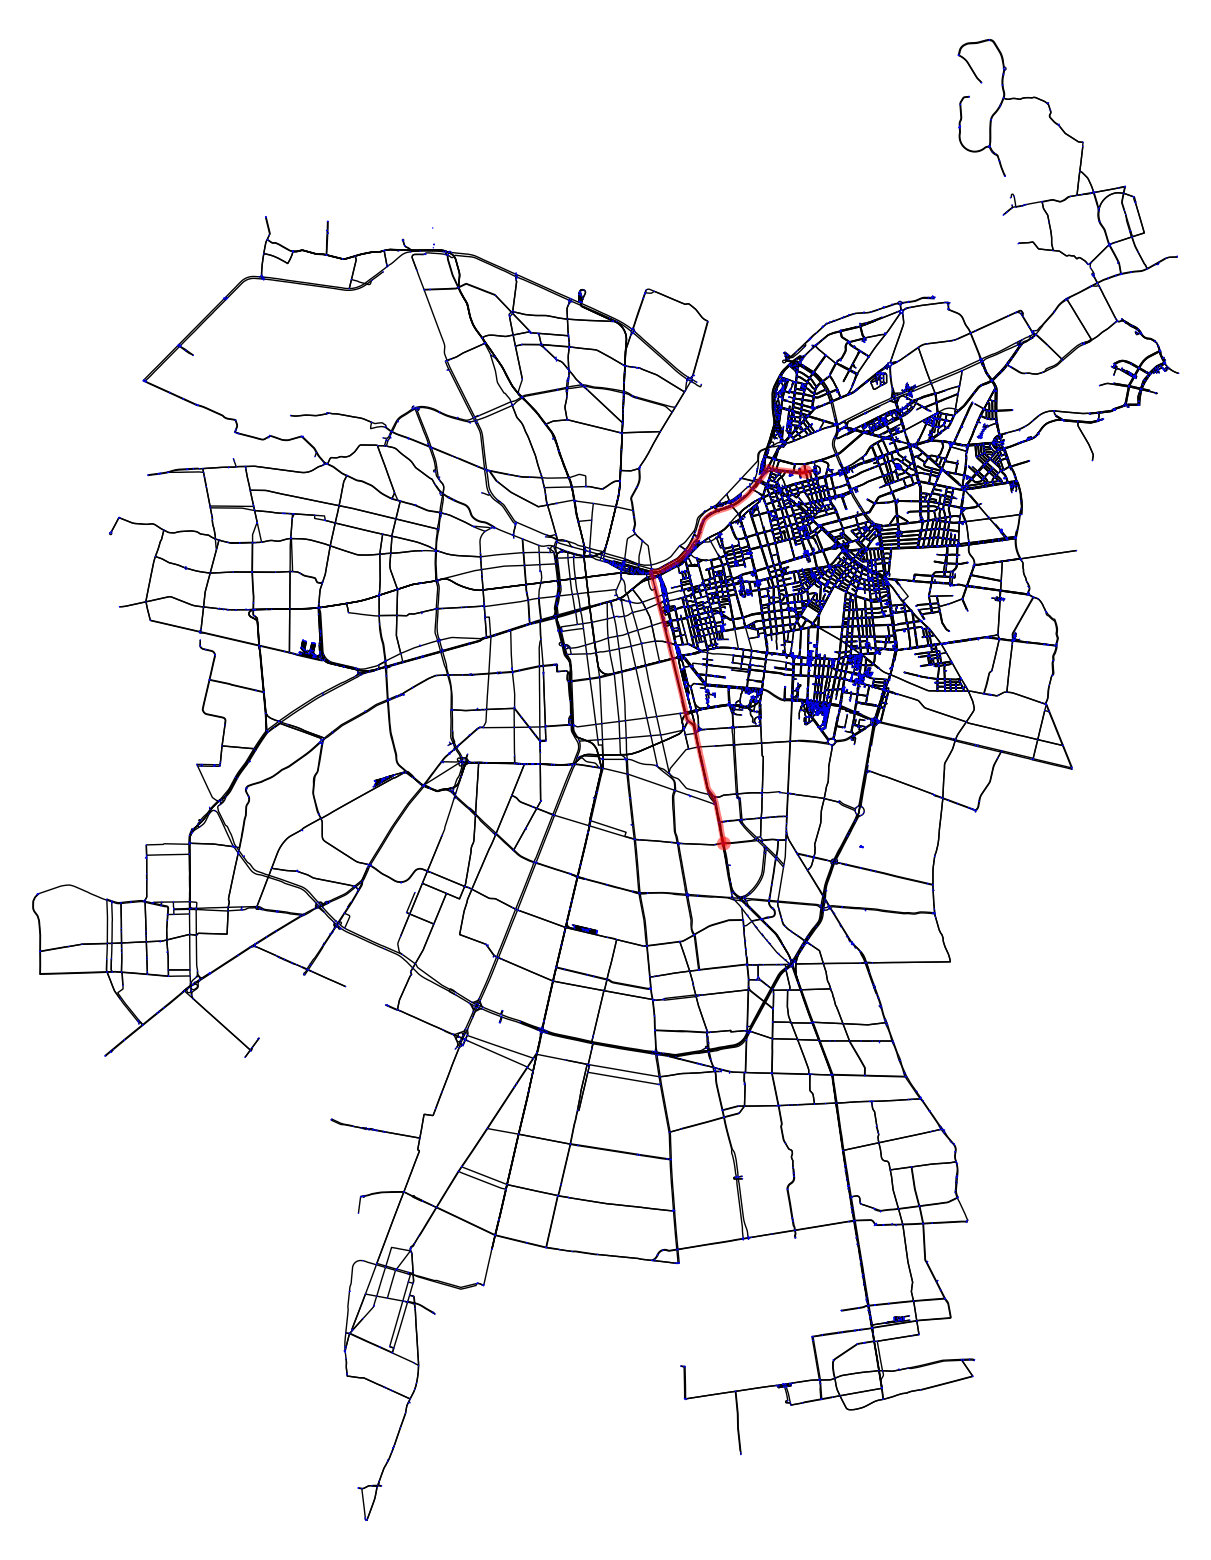

(<Figure size 2000x2000 with 1 Axes>, <Axes: >)

In [103]:
ox.plot_graph_route(G_caminar_conducir_metro, ruta_distrito_max_tiempo, node_size = 1, figsize=(20,20), bgcolor = 'w', node_color = 'blue', edge_color = 'black')

1. **Cálculo de Costos de Rutas**:  
   Utilizamos la función `nx.shortest_path_length()` con el peso `'length'` para calcular la distancia total de cada ruta.

2. **Comparación de Costos**:  
   Imprimiremos los costos para identificar qué ruta es más corta.

3. **Visualización de Rutas**:  
   Utilizaremos `ox.plot_graph_route()` para graficar las rutas, aplicando distintos colores para diferenciar las rutas con y sin centroide.

## Parametros para el grafo: Tomamos parametros usados en el ejercicio 1 debido a que nos serán útil para este ejercicio. 

In [104]:
Macul_Nororiente = (-33.471093, -70.578084)
Macul_Surponiente = (-33.506894, -70.612903)

orig_node = ox.distance.nearest_nodes(G_Macul, Macul_Nororiente[1], Macul_Nororiente[0])
dest_node = ox.distance.nearest_nodes(G_Macul, Macul_Surponiente[1], Macul_Surponiente[0])

In [105]:
ruta_optima_nororiente_surponiente = nx.shortest_path(G_Macul, orig_node, dest_node, weight = 'length')

In [106]:
distritos_urbanos = gpd.overlay(distritos, santiago_urbano, how="intersection")

In [107]:
comunas_urbanas = distritos_urbanos.dissolve(by="NOM_COM")
comunas_urbanas.head(5)

,geometry,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_DIS,CODIGO,E,D,C3,C2,ABC1,ADIMARK_T,Area,Densidad,1_UF_M2,NOMBRE,TIPO_AREA,SHAPE_Leng,SHAPE_Area
NOM_COM,,,,,,,,,,,,,,,,,,,,
Cerrillos,"POLYGON ((-70.69492 -33.47901, -70.69425 -33.4...",Región Metropolitana De Santiago,131,Santiago,13102,Cerrillos,1310201.0,71.0,675.0,835.0,494.0,69.0,2144.0,8062397.85,2.66,2.58,Santiago,Ciudad,427491.444262,5.821041e+08
Cerro Navia,"POLYGON ((-70.72156 -33.43629, -70.72173 -33.4...",Región Metropolitana De Santiago,131,Santiago,13103,Cerro Navia,1310301.0,765.0,3370.0,1674.0,319.0,13.0,6141.0,1782987.73,34.44,2.89,Santiago,Ciudad,427491.444262,5.821041e+08
Colina,"POLYGON ((-70.72133 -33.32024, -70.72680 -33.3...",Región Metropolitana De Santiago,133,Chacabuco,13301,Algarrobal,1330103.0,286.0,656.0,746.0,332.0,89.0,2109.0,39793208.00,0.53,0.79,Santiago,Ciudad,427491.444262,5.821041e+08
Conchalí,"POLYGON ((-70.68212 -33.40329, -70.68569 -33.3...",Región Metropolitana De Santiago,131,Santiago,13104,Conchalí,1310401.0,104.0,1133.0,963.0,425.0,28.0,2653.0,835799.10,31.74,5.40,Santiago,Ciudad,427491.444262,5.821041e+08
El Bosque,"POLYGON ((-70.66693 -33.58469, -70.67653 -33.5...",Región Metropolitana De Santiago,131,Santiago,13105,El Bosque,1310501.0,267.0,1944.0,1587.0,681.0,43.0,4522.0,4310150.84,10.49,3.71,Santiago,Ciudad,427491.444262,5.821041e+08


In [108]:
comunas_urbanas.to_crs("EPSG:4326", inplace=True)

In [109]:
macul_comuna_urbana = comunas_urbanas.loc["Macul"]

In [110]:
macul_centroide_4c_proyectado = macul_comuna_urbana.geometry.centroid

In [111]:
nodo_macul_centroide = ox.distance.nearest_nodes(G_Macul, macul_centroide_4c_proyectado.x, macul_centroide_4c_proyectado.y)

In [112]:
G_proyectado = ox.project_graph(G_Macul, to_crs="EPSG:32719")

In [113]:
# Calcular el costo de la ruta óptima directa (sin centroide)
costo_ruta_optima = nx.shortest_path_length(
    G_proyectado, source=orig_node, target=dest_node, weight='length'
)

# Calcular el costo de la ruta con paso por el centroide (suma de dos tramos)
costo_ruta_1 = nx.shortest_path_length(
    G_proyectado, source=orig_node, target=nodo_macul_centroide, weight='length'
)
costo_ruta_2 = nx.shortest_path_length(
    G_proyectado, source=nodo_macul_centroide, target=dest_node, weight='length'
)
costo_ruta_con_centroide = costo_ruta_1 + costo_ruta_2

# Imprimir los costos para comparar
print(f"Costo ruta óptima directa (sin centroide): {costo_ruta_optima:.2f} metros")
print(f"Costo ruta con centroide: {costo_ruta_con_centroide:.2f} metros")


Costo ruta óptima directa (sin centroide): 6253.07 metros
Costo ruta con centroide: 6705.70 metros


In [114]:
ruta_optima_nororiente_surponiente = nx.shortest_path(G_Macul, orig_node, dest_node, weight = 'length')

In [116]:
ruta_macul_nororiente_centroide = nx.shortest_path(G_Macul, orig_node, nodo_macul_centroide, weight = 'length')
ruta_macul_surponiente_centroide = nx.shortest_path(G_Macul, nodo_macul_centroide, dest_node, weight = 'length')

In [120]:
x_orig, y_orig = G_proyectado.nodes[orig_node]['x'], G_proyectado.nodes[orig_node]['y']
x_dest, y_dest = G_proyectado.nodes[dest_node]['x'], G_proyectado.nodes[dest_node]['y']
x_centroide, y_centroide = G_proyectado.nodes[nodo_macul_centroide]['x'], G_proyectado.nodes[nodo_macul_centroide]['y']

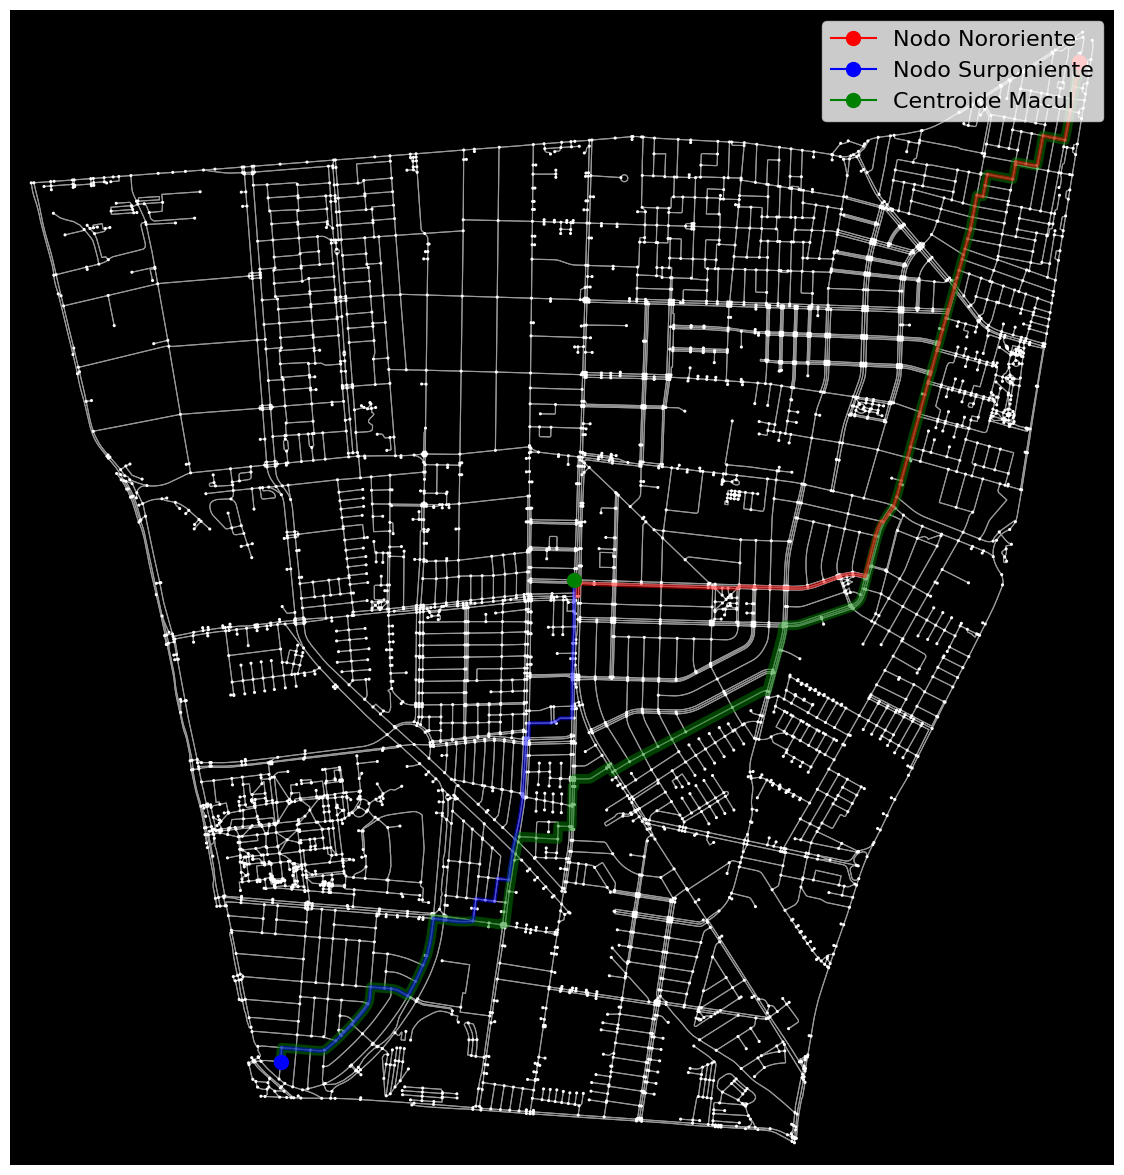

In [121]:
# Graficar la red vial con estética personalizada
fig, ax = ox.plot_graph(
    G_proyectado,
    node_size=5,
    node_color='white',
    edge_linewidth=0.8,
    bgcolor='black',
    figsize=(15, 15),
    show=False,
    close=False
)

# Graficar la ruta óptima directa en verde
ox.plot_graph_route(
    G_proyectado, ruta_optima_nororiente_surponiente, route_color='green',
    route_linewidth=7, ax=ax, show=False, close=False
)

# Graficar las rutas con paso por el centroide en dos colores
ox.plot_graph_route(
    G_proyectado, ruta_macul_nororiente_centroide, route_color='red',
    route_linewidth=3, ax=ax, show=False, close=False
)
ox.plot_graph_route(
    G_proyectado, ruta_macul_surponiente_centroide, route_color='blue',
    route_linewidth=3, ax=ax, show=False, close=False
)

# Agregar los nodos extremos y el centroide con marcadores diferenciados
ax.plot(x_orig, y_orig, marker='o', markersize=10, color='red', label='Nodo Nororiente')
ax.plot(x_dest, y_dest, marker='o', markersize=10, color='blue', label='Nodo Surponiente')
ax.plot(x_centroide, y_centroide, marker='o', markersize=10, color='green', label='Centroide Macul')

# Agregar leyenda para identificar las rutas y nodos
ax.legend(loc='upper right')

# Mostrar la gráfica
plt.show()


In [122]:
largo_ruta_optima_nororiente_surponiente = nx.shortest_path_length(G_Macul, orig_node, dest_node, weight = 'length')
print(f"El largo de la ruta óptima es: {largo_ruta_optima_nororiente_surponiente}")

El largo de la ruta óptima es: 6253.072999999999
